# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [144]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

bb = pd.read_csv('/Users/colinjclemence/Documents/DSI_SM_01/projects/01-projects-weekly/project-02/assets/billboard.csv')
bb.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
bb.get_dtype_counts()

float64    75
int64       2
object      6
dtype: int64

In [147]:
#shortest track on the chart
dfbb['Time'].min()

'2:36'

In [107]:
#longest track on the chart
dfbb['Time'].max()

'7:50'

In [167]:
#most popular genres on Billboard 100 for 2000
genres = pd.value_counts(dfbb['Genre'])
genres = pd.DataFrame(genres)
print genres

             Genre
Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1


In [155]:
#most songs on chart in 2000
artist = pd.value_counts(dfbb['Artist'])
artist = pd.DataFrame(artist)
artist.head()

,Artist
Jay-Z,5
"Houston, Whitney",4
"Dixie Chicks, The",4
DMX,3
"Aguilera, Christina",3


In [156]:
#least songs on chart in 2000
artist.tail()

,Artist
"Elliott, Missy ""Misdemeanor""",1
Lil' Mo,1
Bon Jovi,1
Goo Goo Dolls,1
Clark Family Experience,1


##### Write a brief description of your data, and any interesting observations you've made thus far. 

In [ ]:
It appears that the data consists of the Billboard Top 100 Rankings from 2000. At first glance most songs seem to peak abouit 7-12 weeks after they enter the charts. After a song has left the charts their is no data entered in the weeks following for that song. I will have to remove the columns or enter values in the empty cells.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [158]:
dfbb = pd.DataFrame(bb)
#dfbb.shape
#317 rows x 83 columns
#bb.dtypes
#types include int64, object and float64
column_names = dfbb.columns.tolist()
column_names[column_names.index('year')] = 'Year'
column_names[column_names.index('artist.inverted')] = 'Artist'
column_names[column_names.index('track')] = 'Track'
column_names[column_names.index('time')] = 'Time'
column_names[column_names.index('genre')] = 'Genre'
column_names[column_names.index('date.entered')] = 'Date Entered'
column_names[column_names.index('date.peaked')] = 'Date Peaked'

for i in column_names:
   y = i  
   if str(i).startswith('x'):
       i = i[1: ]
       #print(i)
       i = str(i).replace('.', ' ')
       #print(i)
       column_names[column_names.index ( y) ] = i
       dfbb.columns = column_names
dfbb

,Year,Artist,Track,Time,Genre,Date Entered,Date Peaked,1st week,2nd week,3rd week,...,67th week,68th week,69th week,70th week,71st week,72nd week,73rd week,74th week,75th week,76th week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
#no data in weeks 67-76!!!
dfbb.iloc[0:, 7:, ].head()

,1st week,2nd week,3rd week,4th week,5th week,6th week,7th week,8th week,9th week,10th week,...,67th week,68th week,69th week,70th week,71st week,72nd week,73rd week,74th week,75th week,76th week
0,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
#convert NaNs to 0
pd.pivot_table(dfbb,index=["Genre", "Artist", "Track"], fill_value=0)

10th week  \
Genre   Artist                  Track                                           
Country Adkins, Trace           More                                       83   
        Allan, Gary             Smoke Rings In The Dark                     0   
        Black, Clint            Been There                                 44   
        Brock, Chad             A Country Boy Can Survive                   0   
                                Yes!                                       31   
        Brooks & Dunn           You'll Always Be Loved By Me               68   
        Brooks, Garth           Do What You Gotta Do                        0   
        Byrd, Tracy             Put Your Hand In Mine                       0   
        Cagle, Chris            My Love Goes On And On                     83   
        Chesney, Kenny          I Lost It                                  34   
                                What I Need To Do                          57   
        Clark Family Experience Meanwhile Back At The Ranch                81   
        Clark, Terri            A Little Gasoline                           0   
        Cyrus, Billy Ray        You Won't Be Lonely Now                    80   
        Davidson, Clay          Unconditional                              56   
        Diffie, Joe             It's Always Somethin'                      85   
                                The Quittin' Kind                           0   
        Dixie Chicks, The       Cold Day In July                           91   
                                Cowboy Take Me Away                        27   
                                Goodbye Earl                               61   
                                Without You                                40   
        Evans, Sara             Born To Fly                                39   
        Gill, Vince             Feels Like Love                            54   
        Gilman, Billy           One Voice                                  44   
        Griggs, Andy            She's More                                 48   
        Hanson                  This Time Around                            0   
        Hart, Beth              L.A. Song                                  97   
        Heatherly, Eric         Flowers On The Wall                        65   
        Herndon, Ty             No Mercy                                   96   
        Jackson, Alan           It Must Be Love                            38   
...                                                                       ...   
Rock    Smash Mouth             Then The Morning Comes                     14   
        Sonique                 It Feels So Good                           12   
        SoulDecision            Faded                                      22   
        Spears, Britney         From The Bottom Of My Broken Heart         35   
                                Lucky                                      86   
                                Oops!.. I Did It Again                     10   
        Spencer, Tracie         Still In My Heart                           0   
        Sting                   Desert Rose                                21   
        Stone Temple Pilots     Sour Girl                                  93   
        Sugar Ray               Falls Apart                                37   
        TLC                     Dear Lie                                    0   
        Tamar                   If You Don't Wanna Love Me                  0   
        Tamia                   Can't Go For That                           0   
        Third Eye Blind         Deep Inside Of You                         97   
                                Never Let You Go                           16   
        Thomas, Carl            Emotional                                  52   
                                I Wish                                     21   
                  

In [163]:
#convert Date Entered and Date Peaked from string to datetime
dfbb['Date Peaked'] = pd.to_datetime(dfbb['Date Peaked'])

dfbb['Date Entered'] = pd.to_datetime(dfbb['Date Entered'])
dfbb.dtypes

Year                     int64
Artist                  object
Track                   object
Time                    object
Genre                   object
Date Entered    datetime64[ns]
Date Peaked     datetime64[ns]
1st week                 int64
2nd week               float64
3rd week               float64
4th week               float64
5th week               float64
6th week               float64
7th week               float64
8th week               float64
9th week               float64
10th week              float64
11th week              float64
12th week              float64
13th week              float64
14th week              float64
15th week              float64
16th week              float64
17th week              float64
18th week              float64
19th week              float64
20th week              float64
21st week              float64
22nd week              float64
23rd week              float64
                     ...      
47th week              float64
48th wee

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

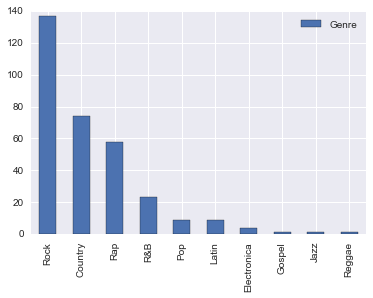

In [121]:
genres.plot(kind = 'bar')
plt.show()

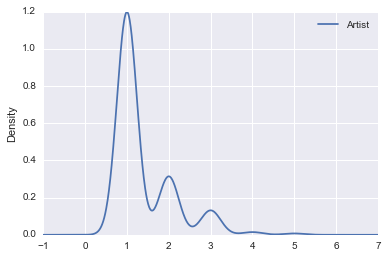

In [142]:
#density distribution of charting tracks per artist for the year
artist.plot(kind = 'kde')
plt.show()

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

In [ ]:
The Billboard table appears to be for one year or 52 weeks but the table conisists of 76 weeks. Why is this? As well, Some songs entered the charts in 1999 which may throw off corelations between songs for their time from entrance to peak of chart and so forth. Perhaps if the song plateaus before 2000 it could show as an outlier to any patterns of growth during its up and down trend.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

In [ ]:
Clean Data:
 • Rename Columns
 • Create useful ways of indexing table.
 • Fill NaN with 0

Visualize:
 • Bar Plot to show which genres were most dominant.
 • Create Dummy Variable and Bar Plot to show which artists were most popular.
 • Density Distribution to show most common tracks by length by genre. Note if there is a common skew across multiple genres.
 • Use Lag Plot to show if the length of tracks are random or strategic.
 • Use Andrews Curve to show track life cycle from Date Entered to Date Peaked, as well as Date Peaked to 0.

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

In [ ]:
https://medium.com/@cjclemence/billboard-top-100-cb1f9ae693e7#.55ip6puuq

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 